In [1]:
pip install pandas numpy yfinance matplotlib seaborn statsmodels

#Data Collection

In [10]:
import yfinance as yf

def fetch_data(ticker):
    data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
    return data

iukp_data = fetch_data('IUKP.L')
ukre_data = fetch_data('UKRE.L')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Data Processing

In [11]:
iukp_data.dropna(inplace=True)
ukre_data.dropna(inplace=True)

iukp_data['Adj Close'] = iukp_data['Adj Close'] / iukp_data['Adj Close'].max()  # Normalize
ukre_data['Adj Close'] = ukre_data['Adj Close'] / ukre_data['Adj Close'].max()  # Normalize

iukp_data['Returns'] = iukp_data['Adj Close'].pct_change()
ukre_data['Returns'] = ukre_data['Adj Close'].pct_change()


# Exploratory Data Analysis

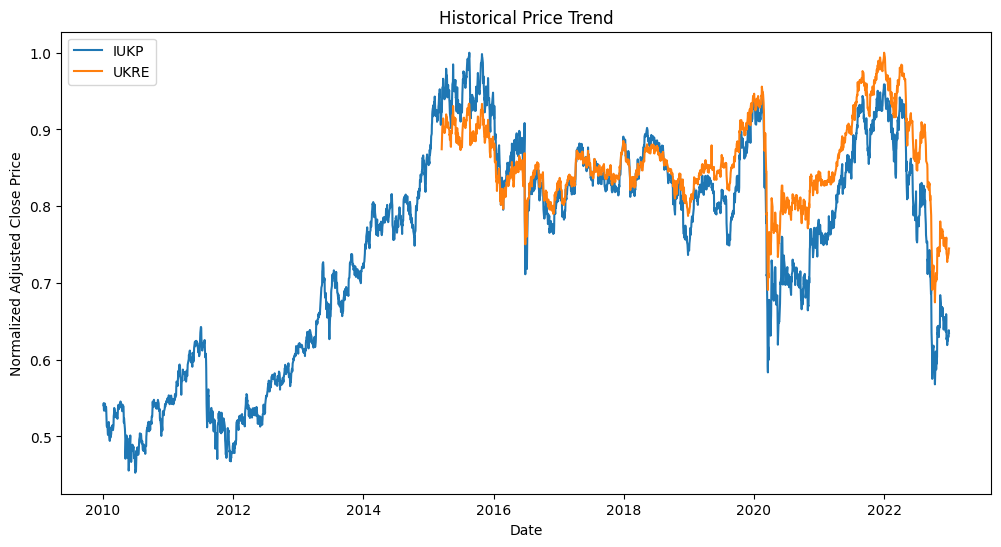

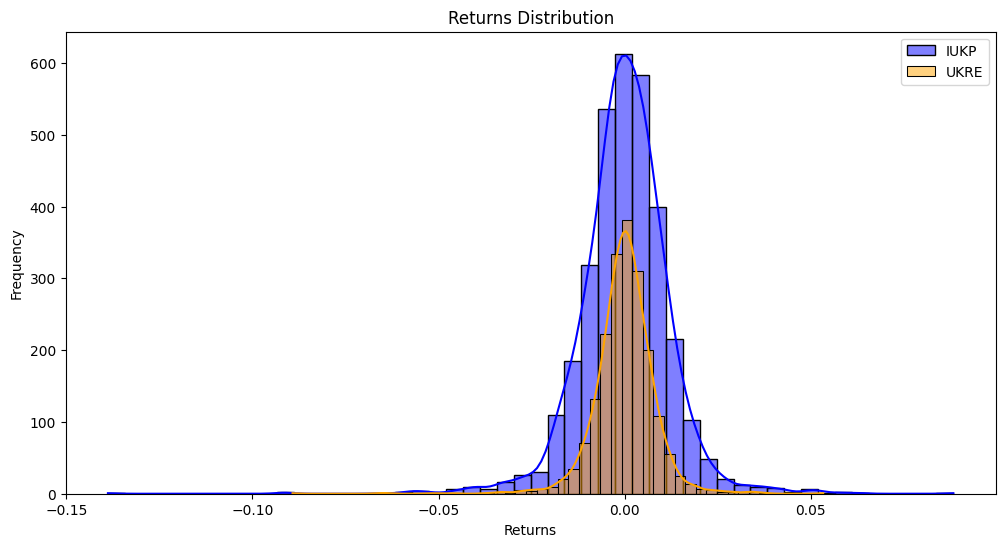

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(iukp_data['Adj Close'], label='IUKP')
plt.plot(ukre_data['Adj Close'], label='UKRE')
plt.title('Historical Price Trend')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(iukp_data['Returns'].dropna(), kde=True, bins=50, color='blue', label='IUKP')
sns.histplot(ukre_data['Returns'].dropna(), kde=True, bins=50, color='orange', label='UKRE')
plt.title('Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Financial Metrics Calculation

In [13]:
volatility_iukp = iukp_data['Returns'].std() * np.sqrt(252)  # Annualized volatility
sharpe_ratio_iukp = iukp_data['Returns'].mean() / iukp_data['Returns'].std() * np.sqrt(252)  # Annualized Sharpe Ratio

volatility_ukre = ukre_data['Returns'].std() * np.sqrt(252)  # Annualized volatility
sharpe_ratio_ukre = ukre_data['Returns'].mean() / ukre_data['Returns'].std() * np.sqrt(252)  # Annualized Sharpe Ratio

print(f"IUKP - Volatility: {volatility_iukp}, Sharpe Ratio: {sharpe_ratio_iukp}")
print(f"UKRE - Volatility: {volatility_ukre}, Sharpe Ratio: {sharpe_ratio_ukre}")


IUKP - Volatility: 0.1949157100356862, Sharpe Ratio: 0.1612847245221342
UKRE - Volatility: 0.13079858180153867, Sharpe Ratio: -0.09075460376088185


# Machine Learning Predictions

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


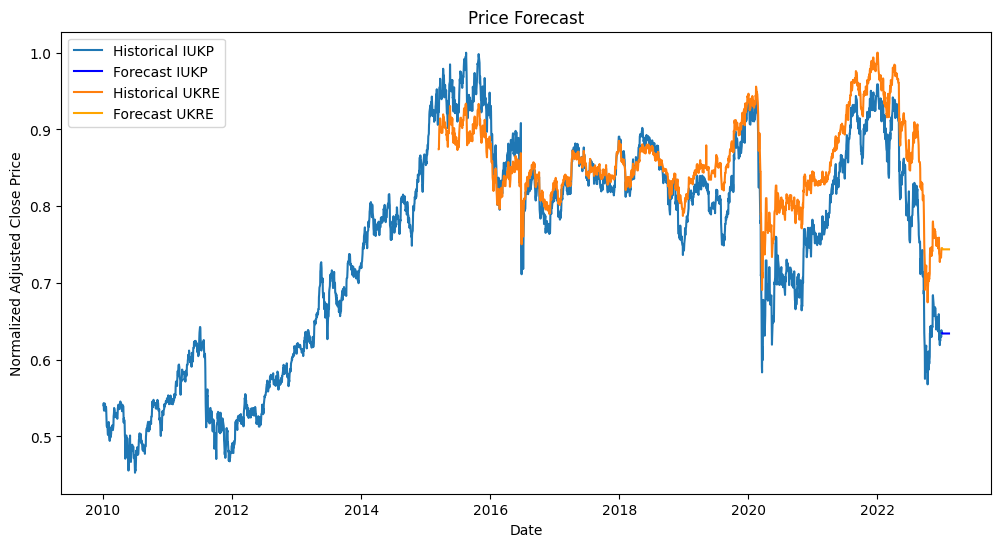

In [18]:
from statsmodels.tsa.arima.model import ARIMA

def fetch_data(ticker):
    data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
    return data

def add_frequency(data):
    data = data.asfreq('B')  # 'B' stands for business day frequency
    data = data.fillna(method='ffill')  # Forward fill to handle missing data
    return data

iukp_data = fetch_data('IUKP.L')
ukre_data = fetch_data('UKRE.L')

iukp_data = add_frequency(iukp_data)
ukre_data = add_frequency(ukre_data)

iukp_data['Adj Close'] = iukp_data['Adj Close'] / iukp_data['Adj Close'].max()  # Normalize
ukre_data['Adj Close'] = ukre_data['Adj Close'] / ukre_data['Adj Close'].max()  # Normalize

# ARIMA model fitting and forecasting
model_iukp = ARIMA(iukp_data['Adj Close'], order=(5,1,0))
model_fit_iukp = model_iukp.fit()
predictions_iukp = model_fit_iukp.forecast(steps=30)

model_ukre = ARIMA(ukre_data['Adj Close'], order=(5,1,0))
model_fit_ukre = model_ukre.fit()
predictions_ukre = model_fit_ukre.forecast(steps=30)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(iukp_data['Adj Close'], label='Historical IUKP')
plt.plot(predictions_iukp.index, predictions_iukp, label='Forecast IUKP', color='blue')
plt.plot(ukre_data['Adj Close'], label='Historical UKRE')
plt.plot(predictions_ukre.index, predictions_ukre, label='Forecast UKRE', color='orange')
plt.title('Price Forecast')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')
plt.legend()
plt.show()


# Conclusion

This project provides a comprehensive analysis of the UK REIT market, focusing on IUKP, and compares it with another UK REIT ETF, UKRE. The analysis includes historical trend analysis, risk and return metrics, and future price predictions, offering a solid foundation for understanding the dynamics of the UK REIT market and making strategic investment choices.

IUKP: Despite higher volatility, IUKP provides a positive risk-adjusted return, making it a potentially better choice for investors who can tolerate higher risk for some positive returns.

UKRE: While less volatile, UKRE's negative Sharpe Ratio indicates that it underperformed relative to the risk-free rate, suggesting poor risk-adjusted performance.